<a href="https://colab.research.google.com/github/jadhav-rakesh/PyTorch/blob/main/pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

t = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

tensor_sum = t.sum()

tensor_sum.backward()

t.grad

tensor([1., 1., 1.])

* PyTorch uses a directed acyclic graph (DAG) to keep a record of all data and computational operations being performed on that data

In [2]:
from sklearn import preprocessing
import numpy as np

features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features)

features_std_tensor = torch.from_numpy(features)

features_std_tensor

tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], dtype=torch.float64)

In [3]:
torch_features = torch.tensor([[-100.1, 3240.1],
                               [-200.2, -234.1],
                               [5000.5, 150.1],
                               [6000.6, -125.1],
                               [9000.9, -673.1]], requires_grad=True)

mean = torch_features.mean(0, keepdim=True)
std = torch_features.std(0, unbiased=False, keepdim=True)

torch_features_std = torch_features - mean
torch_features_std /= std

torch_features_std

tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], grad_fn=<DivBackward0>)

In [4]:
import torch.nn as nn

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.fc1 = nn.Linear(10, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x

network = SimpleNeuralNet()

loss_criterion = nn.BCELoss()
optimzer = torch.optim.RMSprop(network.parameters())

network

SimpleNeuralNet(
  (fc1): Linear(in_features=10, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

ReLU (Rectified Linear Unit) is widely used in hidden layers of neural networks due to several advantages:

* Avoids Vanishing Gradient - Unlike sigmoid and tanh, ReLU does not saturate for positive inputs, reducing the risk of vanishing gradients and enabling better weight updates.

* Computational Efficiency –
ReLU involves simple thresholding (max(0, x)), making it computationally cheaper compared to sigmoid or tanh.

* Sparsity – ReLU outputs zero for negative inputs, leading to sparse activations, which can improve model efficiency and generalization.

* Improves Training Speed – Due to its linear, non-saturating nature, ReLU allows for faster convergence during backpropagation.

* Better Representation Learning – ReLU enables deep networks to capture complex patterns effectively due to its piecewise linear nature.

* Handles Non-Linearity – Despite being a simple function, ReLU introduces non-linearity, allowing deep networks to learn complex mappings.

* Works Well in Practice – Empirical results show that ReLU significantly improves performance in deep learning models.

#Drawbacks (for awareness):
* Dying ReLU Problem – Neurons can get stuck in inactive states (outputting zero) if large negative gradients push them to always be negative.
* Exploding Activations – Without proper weight initialization or regularization, ReLU can lead to large activation values.
* Variants like Leaky ReLU, Parametric ReLU (PReLU), and GELU help mitigate these issues.:

#common output layer patterns

* Binary classification -  sigmoid activation function
* Multiclass classification - a softmax activation function
* Regression - One unit with no activation function

# loss function

* Binary classification - Binary cross-entropy
* Multiclass classification - Categorical cross-entropy
* Regression - Mean square error

#optimizer
* stochastic gradient descent
* stochastic gradient descent with momentum
* root mean square propagation
* adaptive moment estimation

In [5]:
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

SimpleNeuralNet()

SimpleNeuralNet(
  (sequential): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

# Training a Binary Classifier

In [6]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 3

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss/len(train_loader)
    print("Epoch:", epoch+1, "\tLoss", avg_loss)

with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test.float())
    test_accuracy = (output.round() == y_test.float()).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Epoch: 1 	Loss 0.3326633440123664
Epoch: 2 	Loss 0.19515667524602678
Epoch: 3 	Loss 0.1813392365972201
Test Loss: 0.11957792192697525 	Test Accuracy: 0.9599999785423279


#Training a Multiclass Classifier

In [11]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

N_CLASSES = 3
EPOCHS = 3

features, target = make_classification(n_classes=N_CLASSES,
                                       n_informative=9,
                                       n_redundant=0,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(t_train).long(),
                                      num_classes=N_CLASSES).float()
x_test = torch.from_numpy(f_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(t_test).long(),
                                     num_classes=N_CLASSES).float()

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 3),
            torch.nn.Softmax()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

for epoch in range(EPOCHS):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss/len(train_loader)
    print("Epoch:", epoch+1, "\tLoss", avg_loss)

with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/utils.py:1574: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return fn()
/usr/local/lib/python3.11/dist-packages/torch/fx/experimental/symbolic_shapes.py:5498: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = super().run_node(n)
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:2134: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(


Epoch: 1 	Loss 0.9345520660281181
Epoch: 2 	Loss 0.8015430271625519
Epoch: 3 	Loss 0.755523182451725


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/utils.py:1574: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return fn()
/usr/local/lib/python3.11/dist-packages/torch/fx/experimental/symbolic_shapes.py:5498: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = super().run_node(n)


Test Loss: 0.7440760135650635 	Test Accuracy: 0.871666669845581


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:2134: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(


#Training a Regressor

In [19]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

EPOCHS = 20

features, target = make_regression(n_features=10, n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=42)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1)
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn. MSELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

for epoch in range(EPOCHS):
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss/len(train_loader)
    print("Epoch:", epoch+1, "\tLoss", avg_loss)

with torch.no_grad():
    output = network(x_test)
    test_loss = float(criterion(output , y_test))
    print("Test MSE:", test_loss)

Epoch: 1 	Loss 16698.089721679688
Epoch: 2 	Loss 8351.766418457031
Epoch: 3 	Loss 2869.6380615234375
Epoch: 4 	Loss 879.0978546142578
Epoch: 5 	Loss 423.02573013305664
Epoch: 6 	Loss 298.0326156616211
Epoch: 7 	Loss 252.4549331665039
Epoch: 8 	Loss 220.50829315185547
Epoch: 9 	Loss 203.31410598754883
Epoch: 10 	Loss 182.7445182800293
Epoch: 11 	Loss 172.48076820373535
Epoch: 12 	Loss 153.5424747467041
Epoch: 13 	Loss 147.5095090866089
Epoch: 14 	Loss 142.25069904327393
Epoch: 15 	Loss 127.27841663360596
Epoch: 16 	Loss 114.01436138153076
Epoch: 17 	Loss 112.31505012512207
Epoch: 18 	Loss 106.75752830505371
Epoch: 19 	Loss 104.16486024856567
Epoch: 20 	Loss 89.31053447723389
Test MSE: 105.21146392822266


In [20]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 3

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss/len(train_loader)
    print("Epoch:", epoch+1, "\tLoss", avg_loss)


with torch.no_grad():
    predicted_class = network.forward(x_train).round()

predicted_class[0]

Epoch: 1 	Loss 0.42739420466952854
Epoch: 2 	Loss 0.3266519291533364
Epoch: 3 	Loss 0.2937507513496611


tensor([1.])

In [21]:
target[0]

tensor([1.])

Epoch: 1 	Loss 0.42739420466952854
Epoch: 2 	Loss 0.3266519291533364
Epoch: 3 	Loss 0.2937507513496611
Epoch: 4 	Loss 0.281571196185218
Epoch: 5 	Loss 0.27301228046417236
Epoch: 6 	Loss 0.25873030059867436
Epoch: 7 	Loss 0.24836049642827776
Epoch: 8 	Loss 0.238298076722357
Epoch: 9 	Loss 0.22843272652890947
Epoch: 10 	Loss 0.2239339699347814
Epoch: 11 	Loss 0.21535810000366634
Epoch: 12 	Loss 0.2116496960322062
Epoch: 13 	Loss 0.20573188530074227
Epoch: 14 	Loss 0.19887231787045798
Epoch: 15 	Loss 0.1989248212840822
Epoch: 16 	Loss 0.1896055605676439
Epoch: 17 	Loss 0.18800499704149035
Epoch: 18 	Loss 0.17886461483107674
Epoch: 19 	Loss 0.17683366272184584
Epoch: 20 	Loss 0.1749239969584677
Epoch: 21 	Loss 0.17230042815208435
Epoch: 22 	Loss 0.16513769328594208
Epoch: 23 	Loss 0.1657428815960884
Epoch: 24 	Loss 0.15971559782822928
Epoch: 25 	Loss 0.1597395862142245
Epoch: 26 	Loss 0.1539860036638048
Epoch: 27 	Loss 0.15022260281774732
Epoch: 28 	Loss 0.1422579445772701
Epoch: 29 	Loss 

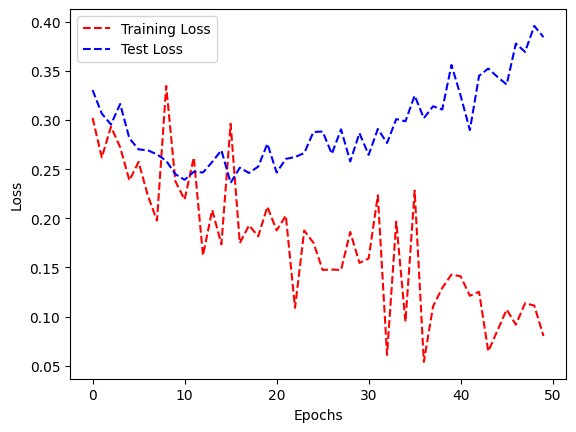

In [26]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss/len(train_loader)
    print("Epoch:", epoch+1, "\tLoss", avg_loss)


    with torch.no_grad():
        train_ouput = network(x_train)
        train_loss = criterion(output, target)
        train_losses.append(train_loss.item())

        test_ouput = network(x_test)
        test_loss = criterion(test_ouput, y_test)
        test_losses.append(test_loss.item())

epochs = range(0, epochs)
plt.plot(epochs, train_losses, "r--", label = "Training Loss")
plt.plot(epochs, test_losses, "b--", label = "Test Loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



#Reducing Overfitting with Weight Regularization

In [34]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=1e-4, weight_decay=1e-5)

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()



with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())



Test Loss: 0.574553906917572 	Test Accuracy: 0.8799999952316284


#Reducing Overfitting with Early Stopping

In [28]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 772.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [30]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
import lightning as pl
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

class LightningNetwork(pl.LightningModule):
    def __init__(self, network):
        super().__init__()
        self.network = network
        self.criterion = nn.BCELoss()
        self.metric = nn.functional.binary_cross_entropy

    def training_step(self, batch, batch_idx):
        data, target = batch
        output = self.network(data)
        loss = self.criterion(output, target)
        self.log("val_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)


train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = LightningNetwork(SimpleNeuralNet())

trainer = pl.Trainer(callbacks=[EarlyStopping(monitor="val_loss", mode="min", patience=3)],
                     max_epochs=1000)
trainer.fit(model=network, train_dataloaders=train_loader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type            | Params | Mode 
------------------------------------------------------
0 | network   | SimpleNeuralNet | 465    | train
1 | criterion | BCELoss         | 0      | train
------------------------------------------------------
465       Trainable params
0         Non-trainable params
465       Total params
0.002     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type            | Params | Mode 
------------------------------------------------------
0 | network   | Simple

Training: |          | 0/? [00:00<?, ?it/s]

#Reducing Overfitting with Dropout

In [32]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Dropout(0, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 10

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss/len(train_loader)
    print("Epoch:", epoch+1, "\tLoss", avg_loss)


with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())


Epoch: 1 	Loss 0.42739420466952854
Epoch: 2 	Loss 0.3266519291533364
Epoch: 3 	Loss 0.2937507513496611
Epoch: 4 	Loss 0.281571196185218
Epoch: 5 	Loss 0.27301228046417236
Epoch: 6 	Loss 0.25873030059867436
Epoch: 7 	Loss 0.24836049642827776
Epoch: 8 	Loss 0.238298076722357
Epoch: 9 	Loss 0.22843272652890947
Epoch: 10 	Loss 0.2239339699347814
Test Loss: 0.24491555988788605 	Test Accuracy: 0.9100000262260437


#Saving Model Training Progress

In [35]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Dropout(0, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 10

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()

        torch.save(
            {
                "epoch":epoch,
                "model_state_dict":network.state_dict(),
                "optimizer_state_dict":optimizer.state_dict(),
                "loss":loss,
            },
            "model.pt"
        )

    print("Epoch:", epoch+1, "\tLoss:", loss.item())



Epoch: 1 	Loss: 0.30226412415504456
Epoch: 2 	Loss: 0.2617690861225128
Epoch: 3 	Loss: 0.29320910573005676
Epoch: 4 	Loss: 0.27236729860305786
Epoch: 5 	Loss: 0.23855085670948029
Epoch: 6 	Loss: 0.25731468200683594
Epoch: 7 	Loss: 0.2234327644109726
Epoch: 8 	Loss: 0.1975921094417572
Epoch: 9 	Loss: 0.33465367555618286
Epoch: 10 	Loss: 0.2376769781112671


#Tuning Neural Networks

In [36]:
!pip install ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 MB 7.3 MB/s eta 0:00:00


In [46]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import RMSprop
from torch.utils.data import random_split, DataLoader, TensorDataset
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self, layer_size_1=10, layer_size_2=10):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, layer_size_1),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_1, layer_size_2),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_2, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        return self.sequential(x)

config = {
    "layer_size_1":tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
    "layer_size_2":tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
    "lr": tune.loguniform(1e-4, 1e-1),
}

scheduler = ASHAScheduler(
    metric="loss",
    mode="min",
    max_t=1000,
    grace_period=1,
    reduction_factor=2
)

reporter = CLIReporter(
    parameter_columns = ["layer_size_1", "layer_size_2", "lr"],
    metric_columns=["loss"]
)

def train_model(config, epochs=3):
    network = SimpleNeuralNet(config["layer_size_1"], config["layer_size_2"])
    criterion = nn.BCELoss()
    optimizer = optim.SGD(network.parameters(), lr=config["lr"], momentum=0.9)
    train_data = TensorDataset(x_train, y_train)
    train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
    network = torch.compile(network)

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = network(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        tune.report(loss=(loss.item()))

result = tune.run(train_model,
                  resources_per_trial={"cpu": 1},
                  config=config,
                  num_samples=1,
                  scheduler=scheduler,
                  progress_reporter=reporter
                  )

best_trial = result.get_best_trial("loss", "min", "last")
print("Best trail config: {}".format(best_trial.config))
print("Best trail final validation loss: {}".format(best_trial.last_result["loss"]))

best_trained_model = SimpleNeuralNet(best_trial.config["layer_size_1"],
                                     best_trial.config["layer_size_2"])

2025-02-24 07:41:50,567	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2025-02-24 07:41:50,571	WARNING tune.py:902 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+--------------------------------------------------------------------+
| Configuration for experiment     train_model_2025-02-24_07-41-50   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        AsyncHyperBandScheduler           |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_2025-02-24_07-41-50

Trial status: 1 PENDING
Current time: 2025-02-24 07:41:50. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                status             lr |
+-------------------------------------------------+
| train_model_cf145_00000   PENDING    0.00132929 |
+-------------------------------------------------+

Trial train_model_cf145_00000 started

(train_model pid=45784) No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
2025-02-24 07:42:10,154	ERROR tune_controller.py:1331 -- Trial task failed for trial train_model_cf145_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2772, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Trial train_model_cf145_00000 errored after 0 iterations at 2025-02-24 07:42:10. Total running time: 19s
Error file: /tmp/ray/session_2025-02-24_07-29-29_880993_371/artifacts/2025-02-24_07-41-50/train_model_2025-02-24_07-41-50/driver_artifacts/train_model_cf145_00000_0_lr=0.0013_2025-02-24_07-41-50/error.txt

Trial status: 1 ERROR
Current time: 2025-02-24 07:42:10. Total running time: 19s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                status             lr |
+-------------------------------------------------+
| train_model_cf145_00000   ERROR      0.00132929 |
+-------------------------------------------------+

Number of errored trials: 1
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  # fai

TuneError: ('Trials did not complete', [train_model_cf145_00000])

#Visualizing Neural Networks

In [47]:
!pip install torchviz

In [53]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from torchviz import make_dot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

f_train, f_test, t_train, t_test = train_test_split(features, target,
                                                    test_size=0.1,
                                                    random_state=1)

torch.manual_seed(42)
np.random.seed(42)

x_train = torch.from_numpy(f_train).float()
y_train = torch.from_numpy(t_train).float().view(-1, 1)
x_test = torch.from_numpy(f_test).float()
y_test = torch.from_numpy(t_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

network = SimpleNeuralNet()

criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

network = torch.compile(network)

epochs = 3

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()

example_input = x_train[:1]
example_output = network(example_input)

# Generate the computational graph
make_dot(example_output, params=dict(network.named_parameters())).render(
    "simple_neural_network",
    format="png"
)



'simple_neural_network.png'